In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Step 1

In [26]:
# Reading dataset
df = pd.read_csv("Datasets/dataset.csv")
df.head()

,f1,f2,f3,f4,f5,f6,f7,target
0,6,148,72,35,0,33.6,0.627,1
1,1,85,66,29,0,26.6,0.351,0
2,8,183,64,0,0,23.3,0.672,1
3,1,89,66,23,94,28.1,0.167,0
4,0,137,40,35,168,43.1,2.288,1


In [27]:
#printing info about dataaset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 766 entries, 0 to 765
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   f1      766 non-null    object
 1   f2      766 non-null    object
 2   f3      766 non-null    int64 
 3   f4      766 non-null    object
 4   f5      766 non-null    object
 5   f6      766 non-null    object
 6   f7      766 non-null    object
 7   target  766 non-null    int64 
dtypes: int64(2), object(6)
memory usage: 48.0+ KB


In [28]:
# handling milabeled values
for col in df.columns:
    df[col] = pd.to_numeric(df[col] , errors = 'coerce') 
df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 766 entries, 0 to 765
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      765 non-null    float64
 1   f2      765 non-null    float64
 2   f3      766 non-null    int64  
 3   f4      765 non-null    float64
 4   f5      765 non-null    float64
 5   f6      765 non-null    float64
 6   f7      765 non-null    float64
 7   target  766 non-null    int64  
dtypes: float64(6), int64(2)
memory usage: 48.0 KB


In [29]:
# data feature
df.describe()

,f1,f2,f3,f4,f5,f6,f7,target
count,765.000000,765.000000,766.000000,765.000000,765.000000,765.000000,765.000000,766.000000
mean,3.849673,120.909804,69.118799,20.542484,80.091503,31.998170,0.472128,0.349869
std,3.373696,31.947945,19.376901,15.960515,115.374383,7.898275,0.331545,0.477240
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,0.000000
25%,1.000000,99.000000,62.500000,0.000000,0.000000,27.300000,0.244000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,36.000000,32.000000,0.374000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,128.000000,36.600000,0.626000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,1.000000


## Visualisation

### 1. Heatmap

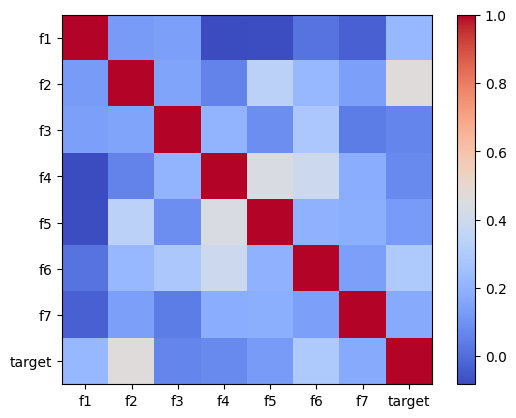

In [40]:
corr = df.corr()
plt.imshow(corr , cmap = 'coolwarm' , interpolation='nearest')
plt.colorbar()
plt.xticks(ticks=np.arange(df.shape[1]), labels=list(df.columns))
plt.yticks(ticks=np.arange(df.shape[1]), labels=list(df.columns))
plt.show()

#### 2. Box Plot for Outlinears in every feature

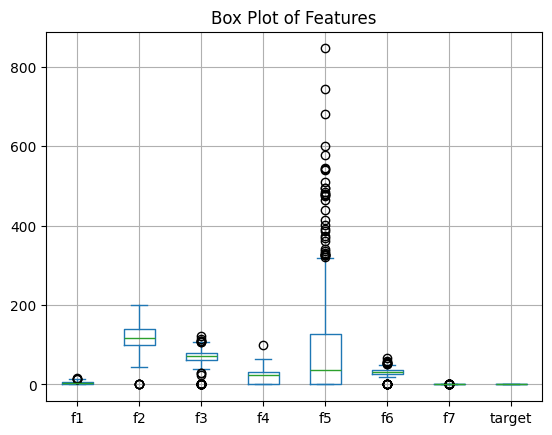

In [42]:
df.plot(kind='box', grid=True)
plt.title('Box Plot of Features')
plt.show()

#### 3. Distribution of Target variable

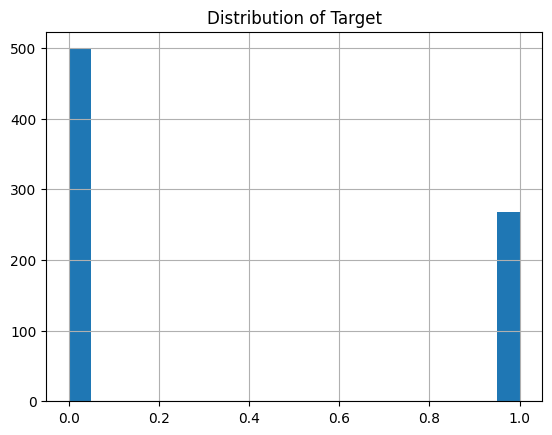

In [47]:
plt.hist(df['target'], bins=20)
plt.grid()
plt.title('Distribution of Target')
plt.show()